# Twitter Customer Service Investigator

Welcome to the Twitter Customer Service Investigator tool! **To use the tool, hit `Cell > Run All` in the menu above and go to the last cell.** There you can choose which service provider to investigate, and how far back you want to investigate (2 weeks or 2 months). Enjoy!

In [1]:
# read in and examine data
import pandas as pd

timeserie_df = pd.read_csv("data/timeseries.csv")

# fixing the index
timeserie_df = timeserie_df.set_index("time")
timeserie_df.index = pd.to_datetime(timeserie_df.index)

timeserie_df.head()

,ATT__avg_cust_sent,ATT__cust_sent_improvement,ATT__comp_resp_timehrs,ATT__issue_was_resolved,BoostCare__avg_cust_sent,BoostCare__cust_sent_improvement,BoostCare__comp_resp_timehrs,BoostCare__issue_was_resolved,TMobileHelp__avg_cust_sent,TMobileHelp__cust_sent_improvement,...,VerizonSupport__comp_resp_timehrs,VerizonSupport__issue_was_resolved,sprintcare__avg_cust_sent,sprintcare__cust_sent_improvement,sprintcare__comp_resp_timehrs,sprintcare__issue_was_resolved,indavg__issue_was_resolved,indavg__avg_cust_sent,indavg__cust_sent_improvement,indavg__comp_resp_timehrs
time,,,,,,,,,,,,,,,,,,,,,
2017-10-05 01:00:00,-0.240121,-0.073483,127.366926,0.147465,-0.147979,-0.194545,12.188163,0.124167,-0.180056,-0.145045,...,215.027747,0.144137,-0.218992,-0.134986,118.042006,0.155786,0.180541,-0.171887,-0.074546,111.041849
2017-10-05 02:00:00,-0.240705,-0.073566,127.452215,0.147882,-0.148063,-0.194628,12.198046,0.125417,-0.180083,-0.144584,...,215.028550,0.144762,-0.219508,-0.135284,118.042247,0.156381,0.181268,-0.172144,-0.074439,111.051205
2017-10-05 03:00:00,-0.241517,-0.074128,127.503188,0.148090,-0.147896,-0.194462,12.211114,0.127083,-0.180302,-0.144525,...,215.028822,0.144762,-0.220445,-0.135254,118.047464,0.156679,0.182124,-0.172426,-0.074394,111.058236
2017-10-05 04:00:00,-0.242559,-0.075170,127.519845,0.148090,-0.147479,-0.194045,12.227365,0.129167,-0.180813,-0.144492,...,215.028955,0.145456,-0.221357,-0.135463,118.049308,0.156679,0.182840,-0.172841,-0.074201,111.063357
2017-10-05 05:00:00,-0.243913,-0.074128,127.534111,0.148090,-0.147063,-0.193628,12.241876,0.131250,-0.181163,-0.143803,...,215.029076,0.147123,-0.222607,-0.136713,118.049532,0.156679,0.183766,-0.173280,-0.073748,111.070280


<IPython.core.display.Javascript object>


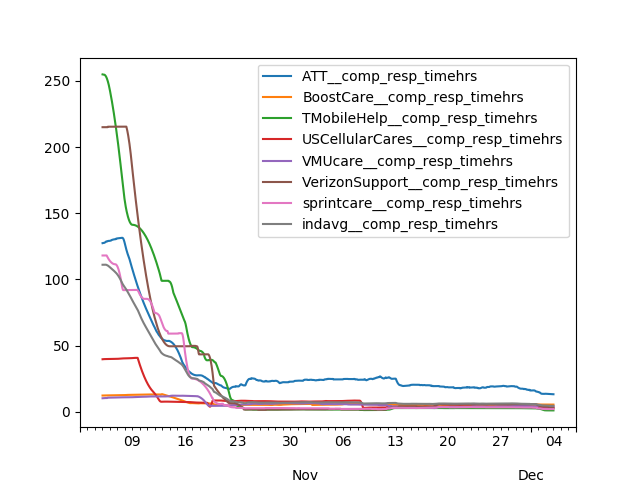

In [2]:
%matplotlib notebook

timeserie_df.plot(y = [c for c in timeserie_df 
                       if "comp_resp_timehrs" in c])

In [3]:
## getting the company names

comp_df = pd.read_csv("companies.csv")
comp_df

,twitter_handle,industry,company_name
0,sprintcare,mobile_service,Sprint
1,USCellularCares,mobile_service,US Cellular
2,VMUcare,mobile_service,Virgin Mobile
3,ATT,mobile_service,AT&T
4,BoostCare,mobile_service,Boost Mobile
5,TMobileHelp,mobile_service,T-Mobile
6,VerizonSupport,mobile_service,Verizon


In [4]:
## getting the static metrics

statmet_df = pd.read_csv("data/static_metrics.csv").set_index("company")
statmet_df

,2_months_issue_was_resolved,2_months_issue_was_resolved_rank,2_months_issue_was_resolved_averageness,2_weeks_issue_was_resolved,2_weeks_issue_was_resolved_rank,2_weeks_issue_was_resolved_averageness,2_months_cust_sent_improvement,2_months_cust_sent_improvement_rank,2_months_cust_sent_improvement_averageness,2_weeks_cust_sent_improvement,2_weeks_cust_sent_improvement_rank,2_weeks_cust_sent_improvement_averageness,2_months_rank,2_months_averageness,2_weeks_rank,2_weeks_averageness
company,,,,,,,,,,,,,,,,
ATT,0.235414,6,below average,0.230792,6,below average,-0.129226,4,below average,-0.159731,7,below average,5,average,7,below average
BoostCare,0.303725,1,above average,0.293857,1,above average,-0.150508,6,below average,-0.126747,3,average,4,average,2,above average
TMobileHelp,0.240491,5,average,0.241808,5,below average,-0.142019,5,below average,-0.144988,5,below average,6,below average,5,below average
USCellularCares,0.265588,3,average,0.274275,3,above average,0.025701,1,above average,-0.014563,2,above average,1,above average,2,above average
VMUcare,0.270162,2,above average,0.285356,2,above average,-0.084910,3,average,-0.147796,6,below average,2,above average,4,average
VerizonSupport,0.247200,4,average,0.266637,4,average,0.020175,2,above average,0.034308,1,above average,2,above average,1,above average
sprintcare,0.198830,7,below average,0.217148,7,below average,-0.172914,7,below average,-0.140022,4,below average,7,below average,5,below average


In [6]:
## use bokeh for interactive results (bar charts, graphs)
# loading modules

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, \
    push_notebook
output_notebook()
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
import numpy as np
from bokeh.models.widgets import PreText

Loading BokehJS ...

In [7]:
# bar chart

metric_props = {
    "issue_was_resolved": {"name": "RESOLUTION RATE"},
    "cust_sent_improvement": {"name": "CUST. SENT. BOOST"}
    }

def get_metric_bar(metric, comp, histstr,
    metric_props = metric_props, 
    timeserie_df = timeserie_df, 
    comp_df = comp_df,
    statmet_df = statmet_df):
    
    # the hist prepend string
    hspre = "_".join(histstr.split())
    
    # get the averages
    met_avg_ser = statmet_df[hspre + "_" + metric]

    # company twitter handle
    comp_th = comp_df[
        comp_df["company_name"] == comp
        ]["twitter_handle"].iloc[0]

    # get mets for comp
    comp_met = met_avg_ser[comp_th]
    
    # get met for ind
    ind_met = met_avg_ser.values.mean()

    # get top company details
    top_comp_th = met_avg_ser.idxmax()
    tc_met = met_avg_ser[top_comp_th]
    tc_name = comp_df[
        comp_df["twitter_handle"] == top_comp_th
        ]["company_name"].iloc[0] + " (best)"

    xlabels = [comp, "Industry avg.", tc_name]
    ys = [comp_met, ind_met, tc_met]

    p = figure(title = metric_props[metric]["name"] + " (on average)",
               x_range = xlabels, 
               plot_width = 300, plot_height = 200,
              )

    source = ColumnDataSource(data={"xlabels": xlabels, "ys": ys, 
                                    "colors": ["blue", "gray", "red"]})
    p.vbar(source = source, x = "xlabels", top = "ys", 
           color = "colors", width = 0.4)
    
    return p

show(get_metric_bar("cust_sent_improvement", "Verizon", "2 months"))

In [8]:
# plotting timeseries

# histstr to timedel dict
histstr2timedel_d = {"2 months": pd.Timedelta(days = 62), 
                     "2 weeks": pd.Timedelta(days = 14)}

def get_metric_timeplot(metric, comp, histstr,
    timeserie_df = timeserie_df, 
    comp_df = comp_df):

    p = figure(title = "Performance with time",
            x_axis_type="datetime", 
            plot_width = 300, plot_height = 200)

    # company twitter handle
    comp_th = comp_df[
        comp_df["company_name"] == comp    
        ]["twitter_handle"].iloc[0]
    
    # keeping only relevant times
    ts_df = timeserie_df.loc[
        timeserie_df.index[-1] - histstr2timedel_d[histstr]
        : None]

    r_comp = p.line(x = ts_df.index, 
                y = ts_df[comp_th + "__" + metric],
                )

    r_avg = p.line(x = ts_df.index, 
                y = ts_df["indavg__" + metric],
                color = "gray", alpha = 0.7,
                )
    
    return p

show(get_metric_timeplot("cust_sent_improvement", "Verizon", "2 months"))

In [13]:
# combine plots into block

def get_met_block(metric, comp, histstr):
    return column(get_metric_bar(metric, comp, histstr),
                  get_metric_timeplot(metric, comp, histstr))

show(get_met_block("cust_sent_improvement", "Verizon", "2 months"))

In [14]:
# function to get statmets for specific metric

def get_statmets(metric, cname, histstr):
    # hist prepend str
    hspre = "_".join(histstr.split())

    # company twitter handle
    comp_th = comp_df[
        comp_df["company_name"] == cname
        ]["twitter_handle"].iloc[0]
    
    # pre statmet str
    presm_str = hspre + "_" + str(metric)
    if metric is None: # looking for combined statmet
        presm_str = hspre

    # get rank
    ranks = statmet_df[presm_str + "_rank"]
    rank = statmet_df[presm_str + "_rank"][comp_th]

    # get topper
    topper_th = ranks.index[ranks == 1][0]
    topper = comp_df[
        comp_df["twitter_handle"] == topper_th
        ]["company_name"].iloc[0]

    # get averageness
    avgness = statmet_df[presm_str + "_averageness"][comp_th]
    
    return {"rank": rank, "topper": topper, "avgness": avgness}

histstr = "2 months"
cname = "AT&T"
metric = "cust_sent_improvement"
    
get_statmets(metric, cname, histstr)

{'rank': 4, 'topper': 'US Cellular', 'avgness': 'below average'}

In [15]:
# text report for company


from bokeh.models.widgets import Div
from bokeh.layouts import widgetbox

def get_text_div(cname, histstr):

    statmet_groups = dict([
        (m, get_statmets(m, cname, histstr)) for m in 
            ["issue_was_resolved", "cust_sent_improvement", None]
        ])

    avgness_to_color_d = {
        "below average": "#000000", # black
        "average": "#808080", # gray
        "above average": "#99cc00", # green
        }

    met_to_heading_d = {
        None: "Overall Satisfaction",
        "issue_was_resolved": "Issue Resolution Rate",
        "cust_sent_improvement": "Customer Sentiment Boost"
        }

    def get_metric_report(metric, 
        statmet_groups = statmet_groups,
        met_to_heading_d = met_to_heading_d):

        # starting metric_report with heading and rank
        met_rep = \
            """
            <h4 style="text-align: left;"><span style="color: #000000;"><span style="color: #ff6600;">""" + \
            met_to_heading_d[metric] + \
            """:</span>&nbsp;</span><span style="color: #000000;"><span style="color: #3366ff;">"""+ \
            "Rank " + str(statmet_groups[metric]["rank"]) + \
            """</span> out of 8 </span></h4>"""

        # averageness
        met_rep += \
            """
            <p style="text-align: left;"><span style="color: #000000;"><span style="color: """ + \
            avgness_to_color_d[statmet_groups[metric]["avgness"]] + \
            """;">&nbsp;&nbsp;&nbsp;""" + \
            statmet_groups[metric]["avgness"]

        # topper
        met_rep += \
            """</span>&nbsp;(1st rank: <span style="color: #ff6600;">""" + \
            statmet_groups[metric]["topper"] + \
            """</span><span style="color: #ff6600;">)</span></span></p>
            """

        return met_rep

    comp_header = """
        <h3 style="text-align: left;"><span style="color: #ff6600;">""" + \
        """Twitter Customer Service Rankings for</span></h3>
        <h3 style="text-align: left;"><em><b>"""+cname+"""</b></em></h3>
        """
    text_report = \
        comp_header + \
        """<div style="height:20px;font-size:1px;">&nbsp;</div>""" + \
        get_metric_report(None) + \
        """<div style="height:10px;font-size:1px;">&nbsp;</div>""" + \
        get_metric_report("issue_was_resolved") + \
        """<div style="height:10px;font-size:1px;">&nbsp;</div>""" + \
        get_metric_report("cust_sent_improvement")

    divbox = widgetbox(Div(text = text_report,
    width=370, height=300))

    return divbox

show(get_text_div("Verizon", "2 weeks"))

In [16]:
# combine blocks

# options. these will be added interactively later
cname = "US Cellular"
histstr = "2 months"
#-------------------------------------

def show_comp_results(company = "Verizon", period = "2 months"):
    
    # renaming arguments to more informative variable names
    cname = company
    histstr = period

    # getting blocks
    text_block = get_text_div(cname, histstr)
    improvement_block = get_met_block("cust_sent_improvement", cname, histstr)
    resolution_block = get_met_block("issue_was_resolved", cname, histstr)

    blocks = row(text_block, resolution_block, improvement_block)

    show(blocks, notebook_handle=True)

show_comp_results(cname, histstr)

In [19]:
# make interactive dashboard

from ipywidgets import interact

cnames = comp_df["company_name"].values
histstrs = ["2 months", "2 weeks"]

interact(show_comp_results, 
         company = cnames, period = histstrs)

interactive(children=(Dropdown(description='company', index=6, options=('Sprint', 'US Cellular', 'Virgin Mobil…

<function __main__.show_comp_results(company='Verizon', period='2 months')>